# Coffee Shop Sales Analysis
## Comprehensive EDA and Business Insights

This notebook provides a deep analysis of coffee shop sales data including:
- Data exploration and cleaning
- Sales trends and patterns
- Customer behavior analysis
- Revenue insights
- Interactive dashboard creation

## 1. Data Loading and Initial Exploration

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for matplotlib
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [4]:
# Load the dataset
df = pd.read_csv('index_1.csv')

# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (3636, 6)

Column Names:
['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name']

Data Types:
date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object

First 5 rows:


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [3]:
# Check for missing values
print("Missing Values:")
missing_vals = df.isnull().sum()
print(missing_vals)
print(f"\nTotal missing values: {missing_vals.sum()}")
print(f"Percentage of missing values: {(missing_vals.sum() / len(df)) * 100:.2f}%")

Missing Values:
date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

Total missing values: 89
Percentage of missing values: 2.45%


In [4]:
# Basic statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,money
count,3636.000000
mean,31.746859
std,4.919926
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


## 2. Data Cleaning and Preprocessing

In [5]:
# Convert datetime columns
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract time components for analysis
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()
df['month'] = df['datetime'].dt.month
df['week'] = df['datetime'].dt.isocalendar().week

# Handle missing card values for cash transactions
df['card'].fillna('CASH_TRANSACTION', inplace=True)

# Check unique values in categorical columns
print("Unique Coffee Types:")
print(df['coffee_name'].unique())
print(f"\nTotal unique coffee types: {df['coffee_name'].nunique()}")

print("\nPayment Methods:")
print(df['cash_type'].value_counts())

print("\nDate Range:")
print(f"From: {df['date'].min()} To: {df['date'].max()}")
print(f"Total days: {(df['date'].max() - df['date'].min()).days + 1}")

Unique Coffee Types:
['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']

Total unique coffee types: 8

Payment Methods:
cash_type
card    3547
cash      89
Name: count, dtype: int64

Date Range:
From: 2024-03-01 00:00:00 To: 2025-03-23 00:00:00
Total days: 388


## 3. Exploratory Data Analysis (EDA)

### 3.1 Sales Overview

In [15]:
# Overall sales metrics
total_revenue = df['money'].sum()
total_transactions = len(df)
avg_transaction_value = df['money'].mean()
unique_customers = df['card'].nunique()

print("=== BUSINESS OVERVIEW ===")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Transactions: {total_transactions:,}")
print(f"Average Transaction Value: ${avg_transaction_value:.2f}")
print(f"Unique Customers: {unique_customers:,}")
print(f"Revenue per Customer: ${total_revenue/unique_customers:.2f}")

# Daily averages
days_in_operation = (df['date'].max() - df['date'].min()).days + 1
print(f"\n=== DAILY AVERAGES ===")
print(f"Days in Operation: {days_in_operation}")
print(f"Average Daily Revenue: ${total_revenue/days_in_operation:.2f}")
print(f"Average Daily Transactions: {total_transactions/days_in_operation:.1f}")

=== BUSINESS OVERVIEW ===
Total Revenue: $115,431.58
Total Transactions: 3,636
Average Transaction Value: $31.75
Unique Customers: 1,317
Revenue per Customer: $87.65

=== DAILY AVERAGES ===
Days in Operation: 388
Average Daily Revenue: $297.50
Average Daily Transactions: 9.4


### 3.2 Product Analysis

In [16]:
# Coffee popularity analysis
coffee_sales = df.groupby('coffee_name').agg({
    'money': ['sum', 'count', 'mean'],
    'card': 'nunique'
}).round(2)

coffee_sales.columns = ['Total_Revenue', 'Quantity_Sold', 'Avg_Price', 'Unique_Customers']
coffee_sales = coffee_sales.sort_values('Total_Revenue', ascending=False)
coffee_sales['Revenue_Share'] = (coffee_sales['Total_Revenue'] / coffee_sales['Total_Revenue'].sum() * 100).round(2)

print("=== COFFEE PRODUCT ANALYSIS ===")
print(coffee_sales)

=== COFFEE PRODUCT ANALYSIS ===
                     Total_Revenue  Quantity_Sold  Avg_Price  \
coffee_name                                                    
Latte                     27866.30            782      35.63   
Americano with Milk       25269.12            824      30.67   
Cappuccino                18034.14            501      36.00   
Americano                 15062.26            578      26.06   
Hot Chocolate             10172.46            282      36.07   
Cocoa                      8678.16            243      35.71   
Cortado                    7534.86            292      25.80   
Espresso                   2814.28            134      21.00   

                     Unique_Customers  Revenue_Share  
coffee_name                                           
Latte                             394          24.14  
Americano with Milk               362          21.89  
Cappuccino                        283          15.62  
Americano                         237          13.05

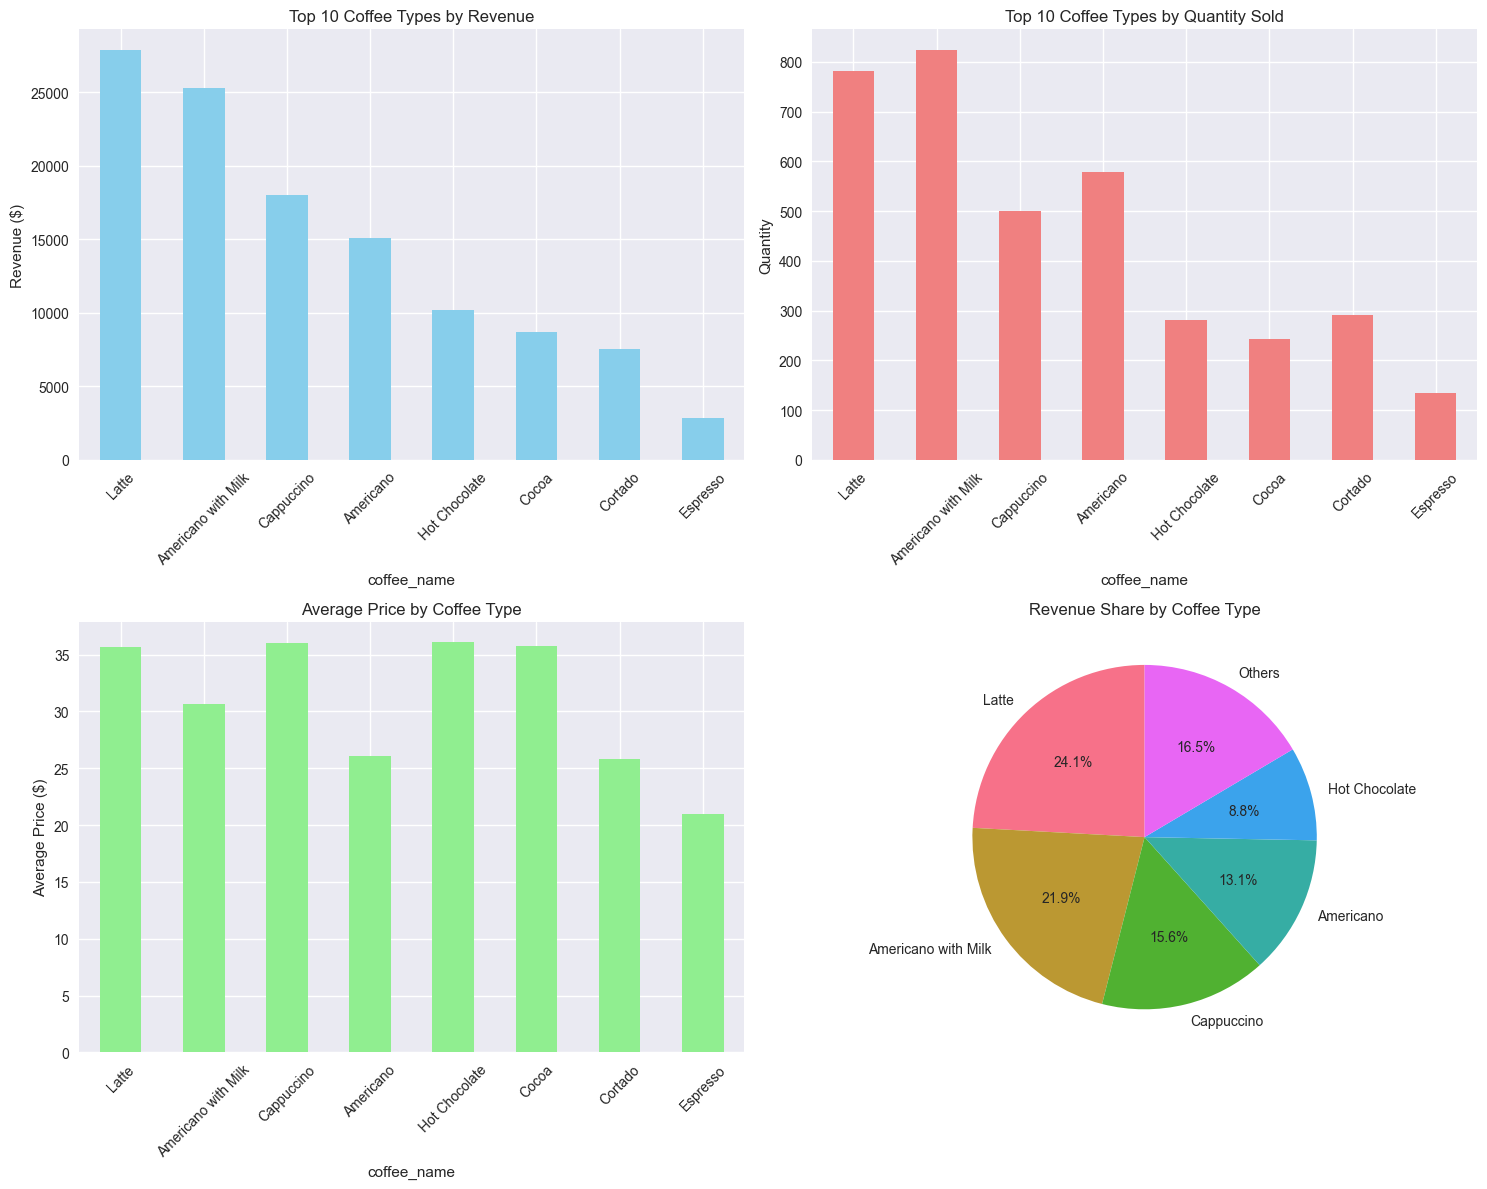

In [8]:
# Visualize top selling products
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Revenue by coffee type
coffee_sales.head(10)['Total_Revenue'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Top 10 Coffee Types by Revenue')
ax1.set_ylabel('Revenue ($)')
ax1.tick_params(axis='x', rotation=45)

# Quantity sold by coffee type
coffee_sales.head(10)['Quantity_Sold'].plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Top 10 Coffee Types by Quantity Sold')
ax2.set_ylabel('Quantity')
ax2.tick_params(axis='x', rotation=45)

# Average price by coffee type
coffee_sales.head(10)['Avg_Price'].plot(kind='bar', ax=ax3, color='lightgreen')
ax3.set_title('Average Price by Coffee Type')
ax3.set_ylabel('Average Price ($)')
ax3.tick_params(axis='x', rotation=45)

# Revenue share pie chart
top_5_coffee = coffee_sales.head(5)
others_revenue = coffee_sales.iloc[5:]['Revenue_Share'].sum()
pie_data = list(top_5_coffee['Revenue_Share']) + [others_revenue]
pie_labels = list(top_5_coffee.index) + ['Others']

ax4.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
ax4.set_title('Revenue Share by Coffee Type')

plt.tight_layout()
plt.show()

### 3.3 Temporal Analysis

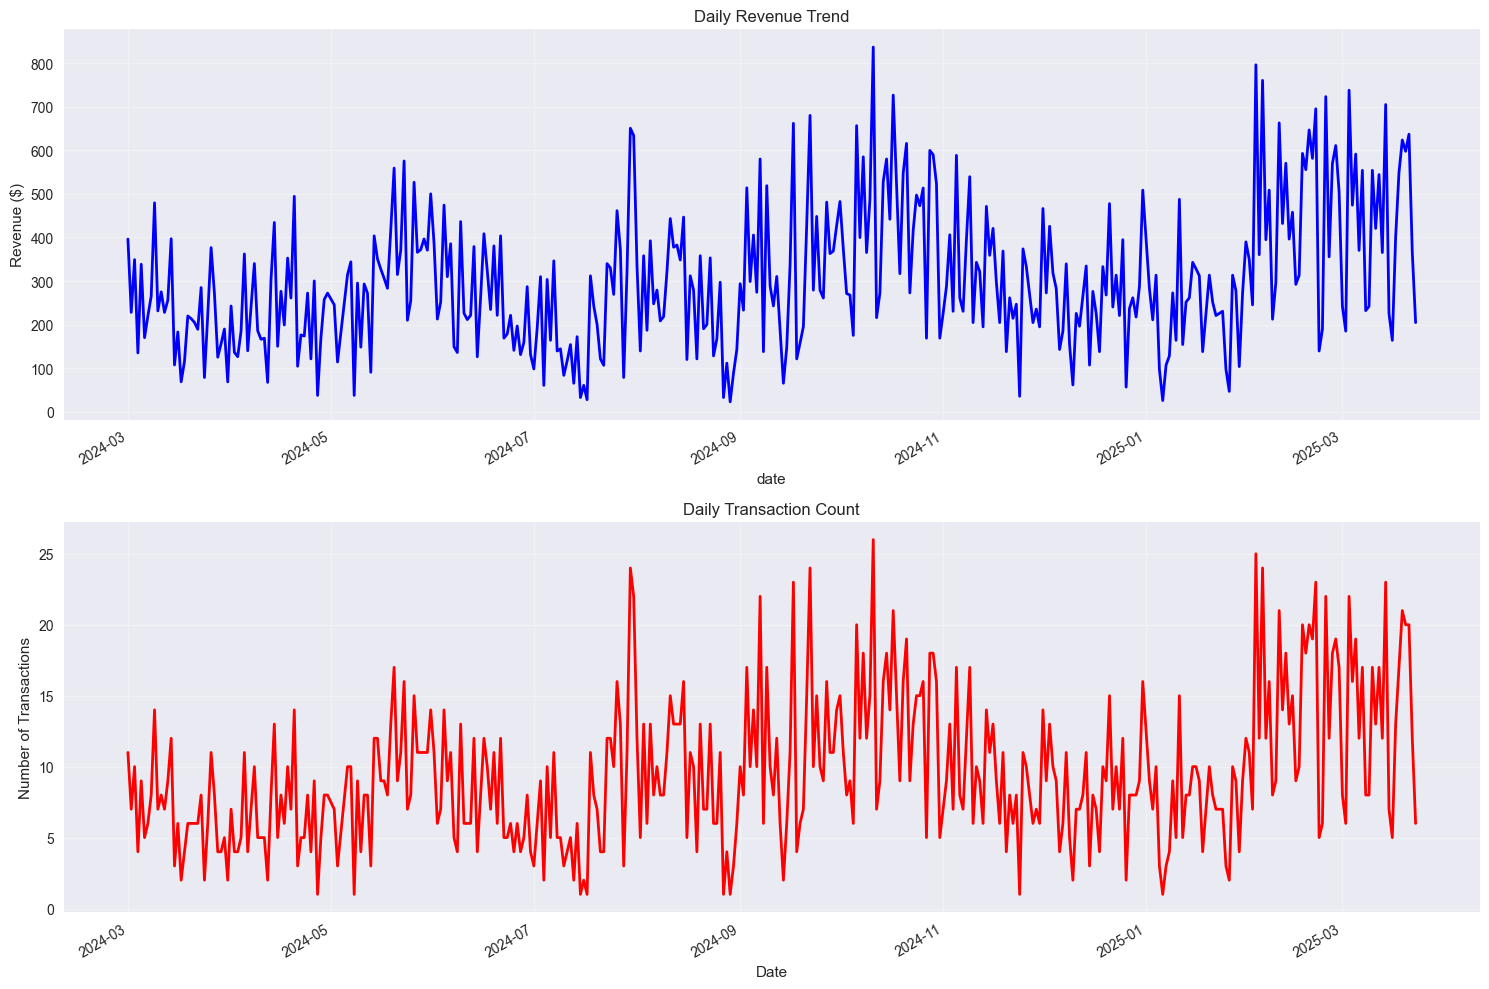

Daily Sales Statistics:
          revenue  transactions
count  381.000000    381.000000
mean   302.970026      9.543307
std    159.816227      5.101737
min     23.020000      1.000000
25%    187.120000      6.000000
50%    276.280000      9.000000
75%    389.920000     12.000000
max    836.660000     26.000000


In [6]:
# Daily sales trend
daily_sales = df.groupby('date').agg({
    'money': 'sum',
    'card': 'count'
}).rename(columns={'money': 'revenue', 'card': 'transactions'})

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Daily revenue trend
daily_sales['revenue'].plot(ax=ax1, color='blue', linewidth=2)
ax1.set_title('Daily Revenue Trend')
ax1.set_ylabel('Revenue ($)')
ax1.grid(True, alpha=0.3)

# Daily transaction count
daily_sales['transactions'].plot(ax=ax2, color='red', linewidth=2)
ax2.set_title('Daily Transaction Count')
ax2.set_ylabel('Number of Transactions')
ax2.set_xlabel('Date')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Daily Sales Statistics:")
print(daily_sales.describe())

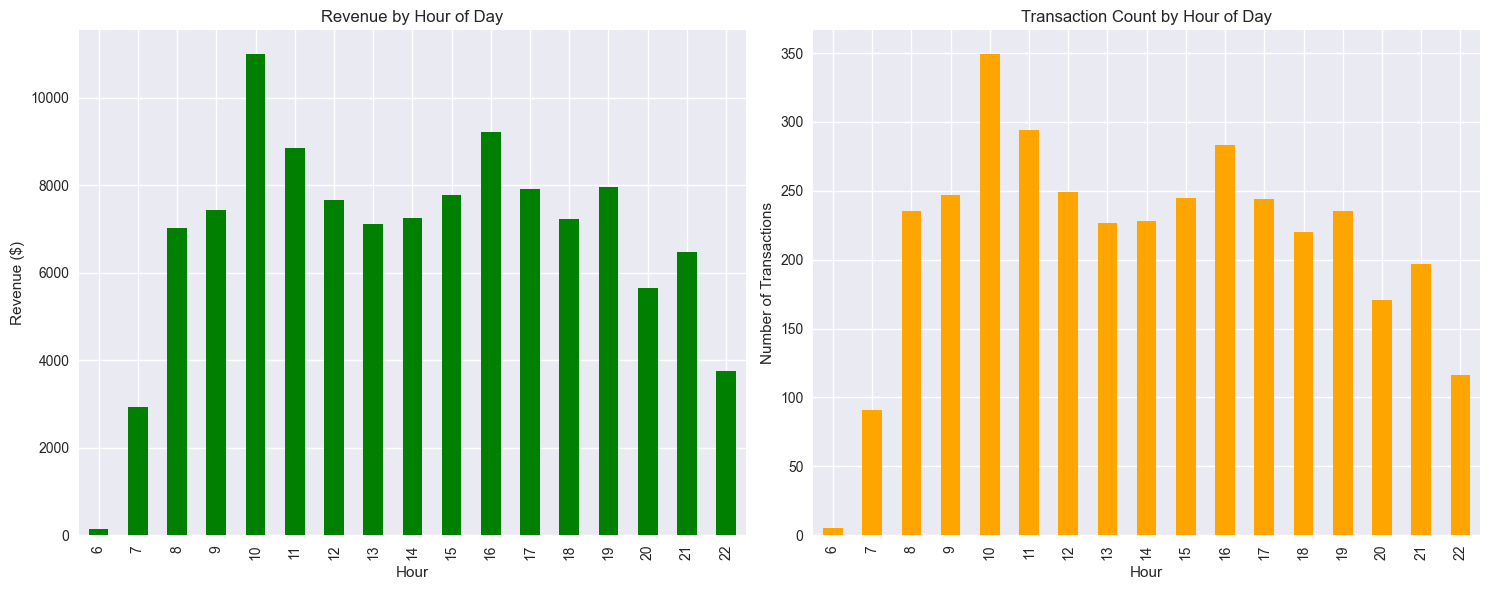

Peak Hours Analysis:
Peak Revenue Hour: 10:00
Peak Transaction Hour: 10:00
Highest Avg Transaction Value Hour: 19:00


In [7]:
# Hourly sales pattern
hourly_sales = df.groupby('hour').agg({
    'money': ['sum', 'count', 'mean']
}).round(2)
hourly_sales.columns = ['Total_Revenue', 'Transaction_Count', 'Avg_Transaction_Value']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Hourly revenue
hourly_sales['Total_Revenue'].plot(kind='bar', ax=ax1, color='green')
ax1.set_title('Revenue by Hour of Day')
ax1.set_ylabel('Revenue ($)')
ax1.set_xlabel('Hour')

# Hourly transaction count
hourly_sales['Transaction_Count'].plot(kind='bar', ax=ax2, color='orange')
ax2.set_title('Transaction Count by Hour of Day')
ax2.set_ylabel('Number of Transactions')
ax2.set_xlabel('Hour')

plt.tight_layout()
plt.show()

print("Peak Hours Analysis:")
print(f"Peak Revenue Hour: {hourly_sales['Total_Revenue'].idxmax()}:00")
print(f"Peak Transaction Hour: {hourly_sales['Transaction_Count'].idxmax()}:00")
print(f"Highest Avg Transaction Value Hour: {hourly_sales['Avg_Transaction_Value'].idxmax()}:00")

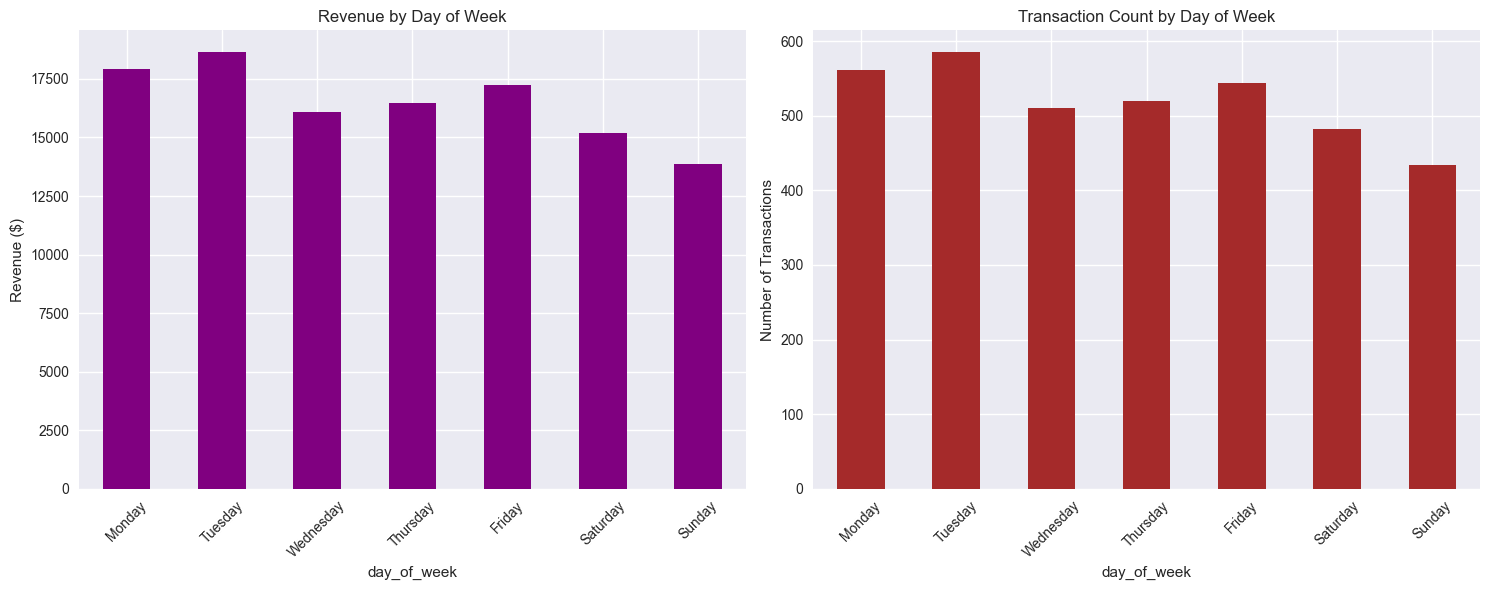

Day of Week Analysis:
             Total_Revenue  Transaction_Count  Avg_Transaction_Value
day_of_week                                                         
Monday            17925.10                561                  31.95
Tuesday           18637.38                585                  31.86
Wednesday         16093.46                510                  31.56
Thursday          16477.40                520                  31.69
Friday            17257.66                544                  31.72
Saturday          15182.52                482                  31.50
Sunday            13858.06                434                  31.93


In [8]:
# Day of week analysis
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = df.groupby('day_of_week').agg({
    'money': ['sum', 'count', 'mean']
}).round(2)
weekly_sales.columns = ['Total_Revenue', 'Transaction_Count', 'Avg_Transaction_Value']
weekly_sales = weekly_sales.reindex(day_order)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Weekly revenue pattern
weekly_sales['Total_Revenue'].plot(kind='bar', ax=ax1, color='purple')
ax1.set_title('Revenue by Day of Week')
ax1.set_ylabel('Revenue ($)')
ax1.tick_params(axis='x', rotation=45)

# Weekly transaction pattern
weekly_sales['Transaction_Count'].plot(kind='bar', ax=ax2, color='brown')
ax2.set_title('Transaction Count by Day of Week')
ax2.set_ylabel('Number of Transactions')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Day of Week Analysis:")
print(weekly_sales)

### 3.4 Payment Method Analysis

=== PAYMENT METHOD ANALYSIS ===
           Total_Revenue  Transaction_Count  Avg_Transaction_Value  \
cash_type                                                            
card           112245.58               3547                  31.65   
cash             3186.00                 89                  35.80   

           Unique_Customers  Revenue_Share  
cash_type                                   
card                   1316          97.24  
cash                      1           2.76  


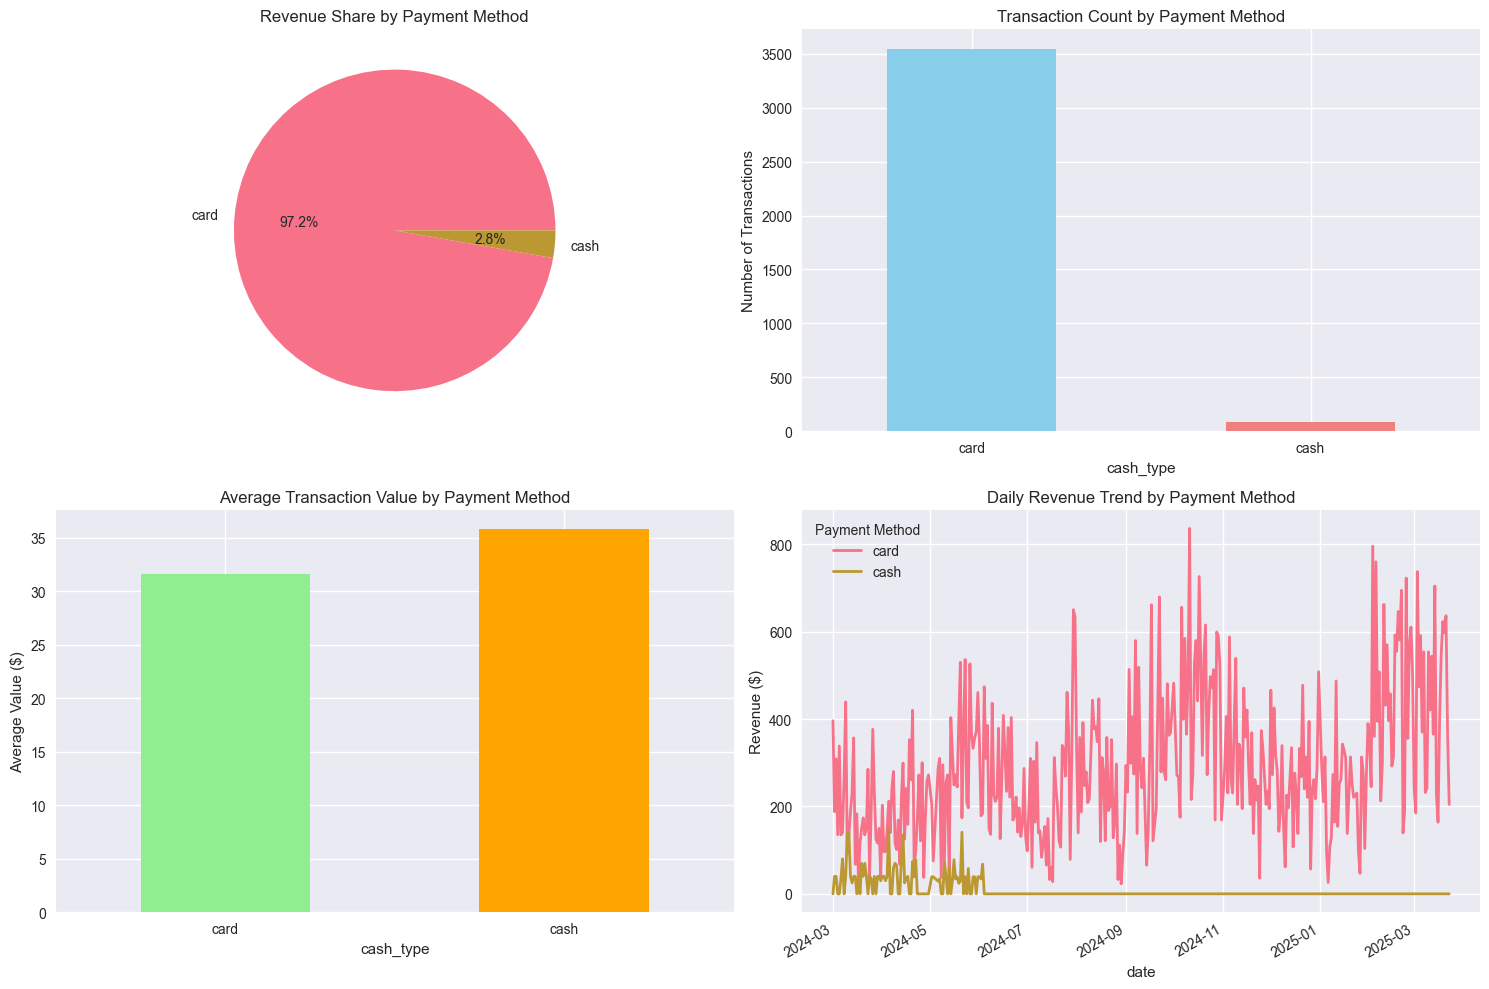

In [9]:
# Payment method analysis
payment_analysis = df.groupby('cash_type').agg({
    'money': ['sum', 'count', 'mean'],
    'card': 'nunique'
}).round(2)
payment_analysis.columns = ['Total_Revenue', 'Transaction_Count', 'Avg_Transaction_Value', 'Unique_Customers']
payment_analysis['Revenue_Share'] = (payment_analysis['Total_Revenue'] / payment_analysis['Total_Revenue'].sum() * 100).round(2)

print("=== PAYMENT METHOD ANALYSIS ===")
print(payment_analysis)

# Visualize payment methods
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Revenue by payment method
payment_analysis['Total_Revenue'].plot(kind='pie', ax=ax1, autopct='%1.1f%%')
ax1.set_title('Revenue Share by Payment Method')
ax1.set_ylabel('')

# Transaction count by payment method
payment_analysis['Transaction_Count'].plot(kind='bar', ax=ax2, color=['skyblue', 'lightcoral'])
ax2.set_title('Transaction Count by Payment Method')
ax2.set_ylabel('Number of Transactions')
ax2.tick_params(axis='x', rotation=0)

# Average transaction value by payment method
payment_analysis['Avg_Transaction_Value'].plot(kind='bar', ax=ax3, color=['lightgreen', 'orange'])
ax3.set_title('Average Transaction Value by Payment Method')
ax3.set_ylabel('Average Value ($)')
ax3.tick_params(axis='x', rotation=0)

# Revenue trend by payment method over time
payment_trend = df.groupby(['date', 'cash_type'])['money'].sum().unstack(fill_value=0)
payment_trend.plot(ax=ax4, linewidth=2)
ax4.set_title('Daily Revenue Trend by Payment Method')
ax4.set_ylabel('Revenue ($)')
ax4.legend(title='Payment Method')

plt.tight_layout()
plt.show()

### 3.5 Customer Behavior Analysis

In [10]:
# Customer analysis (excluding cash transactions)
card_customers = df[df['cash_type'] == 'card'].copy()

customer_analysis = card_customers.groupby('card').agg({
    'money': ['sum', 'count', 'mean'],
    'coffee_name': lambda x: x.nunique(),
    'date': ['min', 'max']
}).round(2)

customer_analysis.columns = ['Total_Spent', 'Visit_Count', 'Avg_Spending_Per_Visit', 
                           'Unique_Products_Tried', 'First_Visit', 'Last_Visit']

# Calculate customer lifetime
customer_analysis['Customer_Lifetime_Days'] = (customer_analysis['Last_Visit'] - customer_analysis['First_Visit']).dt.days + 1

# Customer segmentation based on spending
customer_analysis['Spending_Segment'] = pd.cut(
    customer_analysis['Total_Spent'], 
    bins=[0, 50, 150, 300, float('inf')], 
    labels=['Low Spender', 'Medium Spender', 'High Spender', 'VIP Customer']
)

print("=== CUSTOMER ANALYSIS (Card Customers Only) ===")
print(f"Total Card Customers: {len(customer_analysis)}")
print("\nTop 10 Customers by Total Spending:")
print(customer_analysis.nlargest(10, 'Total_Spent')[['Total_Spent', 'Visit_Count', 'Avg_Spending_Per_Visit']])

print("\nCustomer Segmentation:")
segment_analysis = customer_analysis.groupby('Spending_Segment').agg({
    'Total_Spent': ['count', 'sum', 'mean'],
    'Visit_Count': 'mean'
}).round(2)
print(segment_analysis)

=== CUSTOMER ANALYSIS (Card Customers Only) ===
Total Card Customers: 1316

Top 10 Customers by Total Spending:
                     Total_Spent  Visit_Count  Avg_Spending_Per_Visit
card                                                                 
ANON-0000-0000-0012      3785.92          129                   29.35
ANON-0000-0000-0141      2749.78          108                   25.46
ANON-0000-0000-0009      2343.98           67                   34.98
ANON-0000-0000-1163      2278.22           77                   29.59
ANON-0000-0000-0276      2119.54           69                   30.72
ANON-0000-0000-0507      1797.30           51                   35.24
ANON-0000-0000-0040      1519.48           50                   30.39
ANON-0000-0000-0097      1477.86           47                   31.44
ANON-0000-0000-0570      1061.04           30                   35.37
ANON-0000-0000-1191       965.52           27                   35.76

Customer Segmentation:
                 Total_S

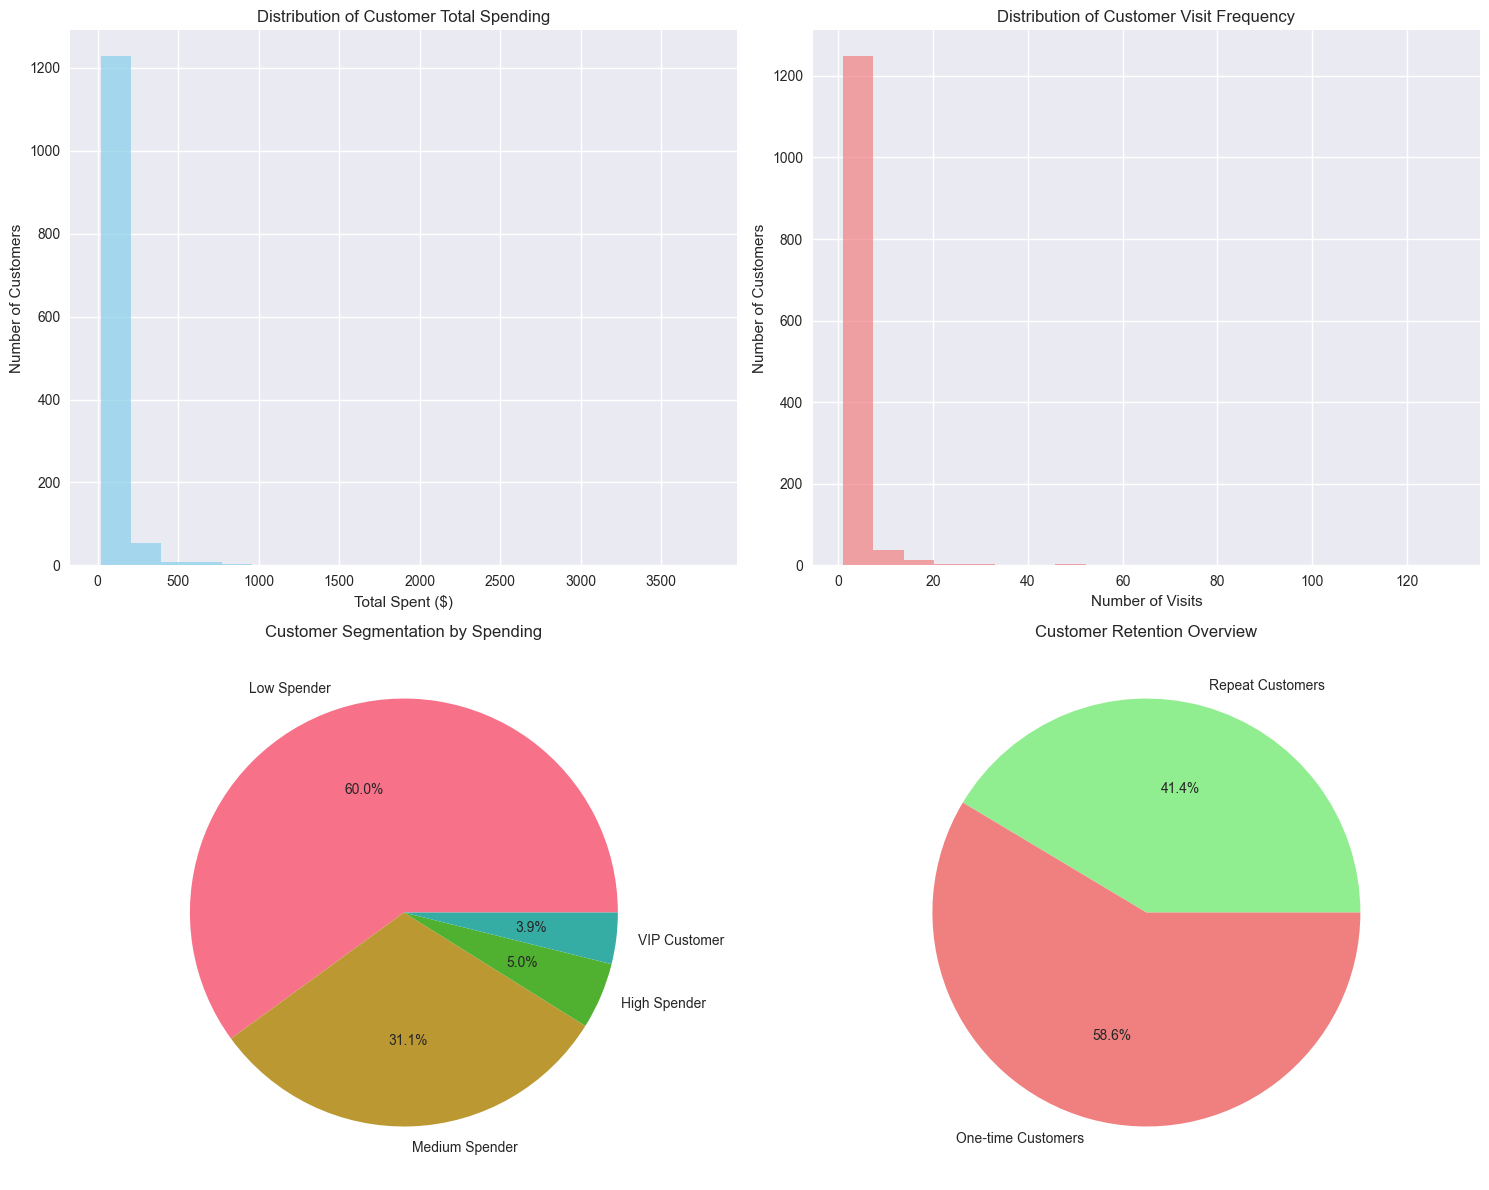


Customer Retention Metrics:
Repeat Customers: 545 (41.4%)
One-time Customers: 771 (58.6%)
Average Visits per Customer: 2.70


In [11]:
# Visualize customer behavior
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Customer spending distribution
customer_analysis['Total_Spent'].hist(bins=20, ax=ax1, color='skyblue', alpha=0.7)
ax1.set_title('Distribution of Customer Total Spending')
ax1.set_xlabel('Total Spent ($)')
ax1.set_ylabel('Number of Customers')

# Visit frequency distribution
customer_analysis['Visit_Count'].hist(bins=20, ax=ax2, color='lightcoral', alpha=0.7)
ax2.set_title('Distribution of Customer Visit Frequency')
ax2.set_xlabel('Number of Visits')
ax2.set_ylabel('Number of Customers')

# Customer segments
segment_counts = customer_analysis['Spending_Segment'].value_counts()
segment_counts.plot(kind='pie', ax=ax3, autopct='%1.1f%%')
ax3.set_title('Customer Segmentation by Spending')
ax3.set_ylabel('')

# Repeat customers vs one-time customers
repeat_customers = (customer_analysis['Visit_Count'] > 1).sum()
one_time_customers = (customer_analysis['Visit_Count'] == 1).sum()
ax4.pie([repeat_customers, one_time_customers], 
        labels=['Repeat Customers', 'One-time Customers'], 
        autopct='%1.1f%%', 
        colors=['lightgreen', 'lightcoral'])
ax4.set_title('Customer Retention Overview')

plt.tight_layout()
plt.show()

print(f"\nCustomer Retention Metrics:")
print(f"Repeat Customers: {repeat_customers} ({repeat_customers/len(customer_analysis)*100:.1f}%)")
print(f"One-time Customers: {one_time_customers} ({one_time_customers/len(customer_analysis)*100:.1f}%)")
print(f"Average Visits per Customer: {customer_analysis['Visit_Count'].mean():.2f}")

## 4. Advanced Analytics

### 4.1 Coffee Preference by Time

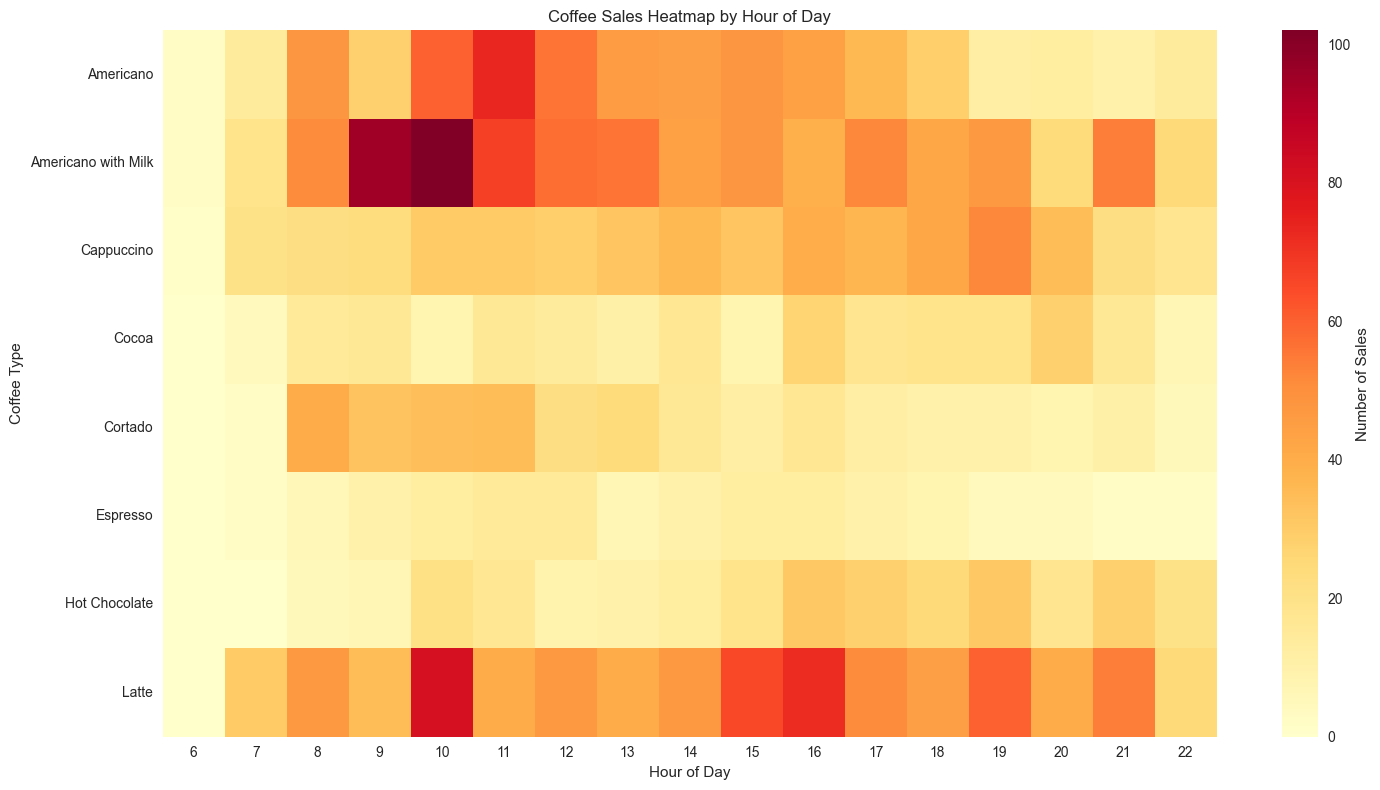

Most Popular Coffee by Time Period:
Morning (6-11): Americano with Milk (336 sales)
Afternoon (12-17): Latte (323 sales)
Evening (18-22): Latte (225 sales)


In [12]:
# Coffee preference by hour of day
coffee_hour_matrix = df.pivot_table(
    values='money', 
    index='coffee_name', 
    columns='hour', 
    aggfunc='count', 
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(coffee_hour_matrix, annot=False, cmap='YlOrRd', cbar_kws={'label': 'Number of Sales'})
plt.title('Coffee Sales Heatmap by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Coffee Type')
plt.tight_layout()
plt.show()

# Most popular coffee by time periods
time_periods = {
    'Morning (6-11)': df[df['hour'].between(6, 11)],
    'Afternoon (12-17)': df[df['hour'].between(12, 17)],
    'Evening (18-22)': df[df['hour'].between(18, 22)]
}

print("Most Popular Coffee by Time Period:")
for period, data in time_periods.items():
    if not data.empty:
        top_coffee = data['coffee_name'].value_counts().head(1)
        print(f"{period}: {top_coffee.index[0]} ({top_coffee.iloc[0]} sales)")

### 4.2 Revenue Forecasting and Trends

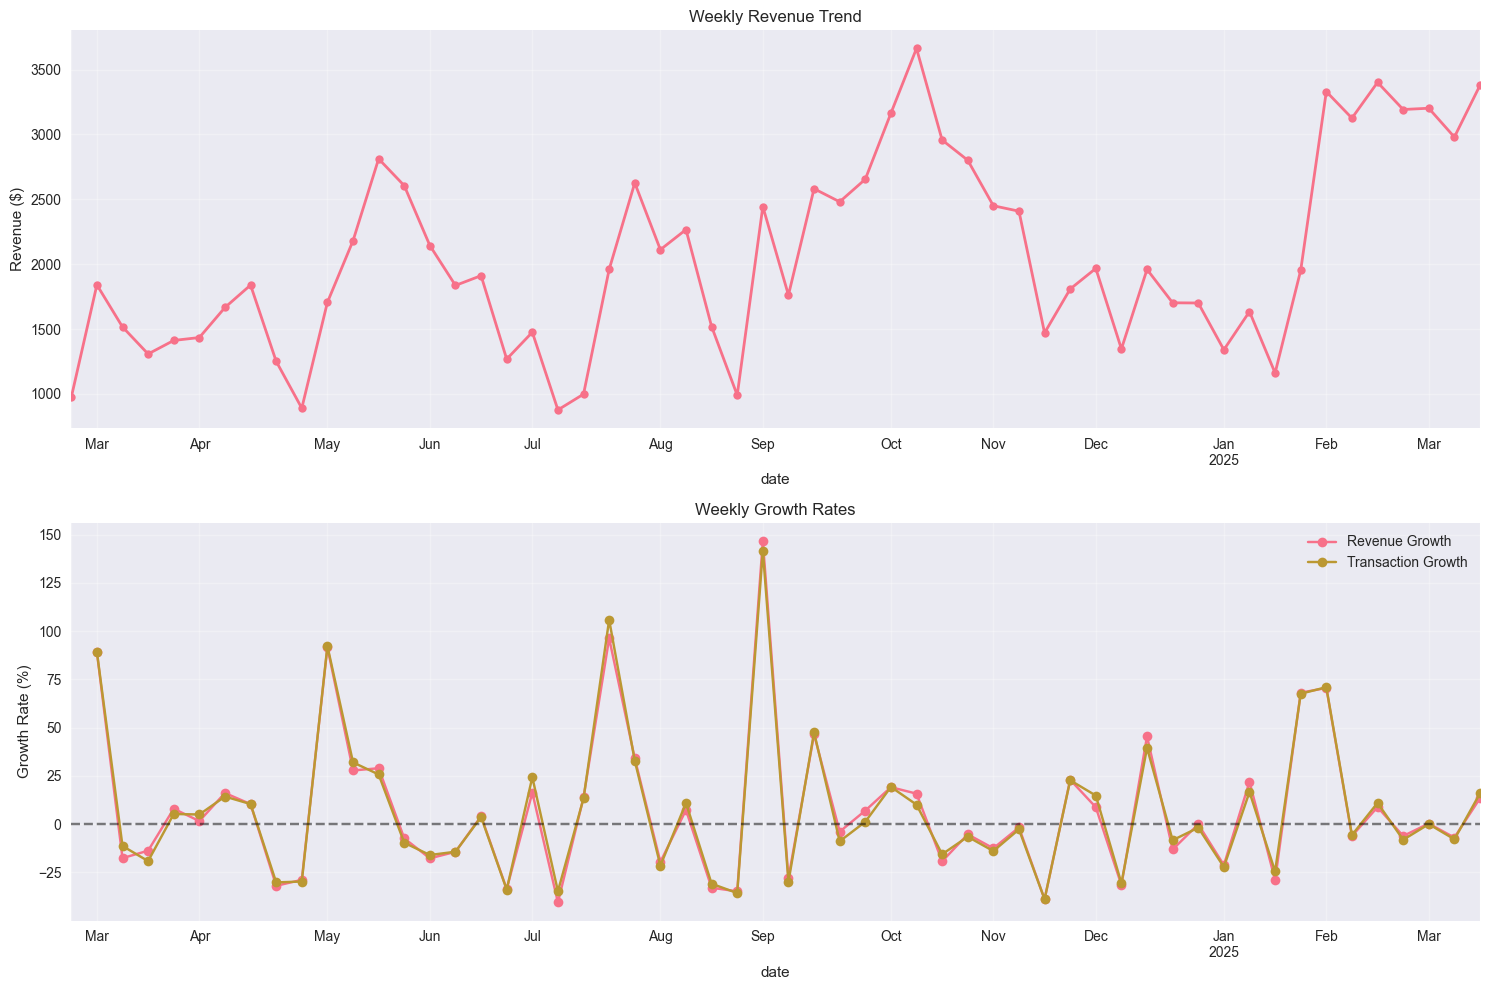

Weekly Performance Summary:
            Weekly_Revenue  Weekly_Transactions  Avg_Transaction_Value  \
date                                                                     
2024-02-26          973.50                   28                  34.77   
2024-03-04         1840.50                   53                  34.73   
2024-03-11         1516.30                   47                  32.26   
2024-03-18         1307.80                   38                  34.42   
2024-03-25         1412.10                   40                  35.30   
2024-04-01         1434.50                   42                  34.15   
2024-04-08         1666.00                   48                  34.71   
2024-04-15         1838.84                   53                  34.70   
2024-04-22         1251.20                   37                  33.82   
2024-04-29          890.18                   26                  34.24   
2024-05-06         1705.80                   50                  34.12   
2024-05-13

In [13]:
# Weekly revenue analysis
weekly_revenue = df.groupby(df['date'].dt.to_period('W'))['money'].agg(['sum', 'count', 'mean']).round(2)
weekly_revenue.columns = ['Weekly_Revenue', 'Weekly_Transactions', 'Avg_Transaction_Value']
weekly_revenue.index = weekly_revenue.index.to_timestamp()

# Calculate growth rates
weekly_revenue['Revenue_Growth_Rate'] = weekly_revenue['Weekly_Revenue'].pct_change() * 100
weekly_revenue['Transaction_Growth_Rate'] = weekly_revenue['Weekly_Transactions'].pct_change() * 100

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Weekly revenue trend
weekly_revenue['Weekly_Revenue'].plot(ax=ax1, marker='o', linewidth=2, markersize=6)
ax1.set_title('Weekly Revenue Trend')
ax1.set_ylabel('Revenue ($)')
ax1.grid(True, alpha=0.3)

# Growth rates
weekly_revenue[['Revenue_Growth_Rate', 'Transaction_Growth_Rate']].plot(ax=ax2, marker='o')
ax2.set_title('Weekly Growth Rates')
ax2.set_ylabel('Growth Rate (%)')
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax2.grid(True, alpha=0.3)
ax2.legend(['Revenue Growth', 'Transaction Growth'])

plt.tight_layout()
plt.show()

print("Weekly Performance Summary:")
print(weekly_revenue)
print(f"\nAverage Weekly Revenue: ${weekly_revenue['Weekly_Revenue'].mean():.2f}")
print(f"Best Week Revenue: ${weekly_revenue['Weekly_Revenue'].max():.2f}")
print(f"Worst Week Revenue: ${weekly_revenue['Weekly_Revenue'].min():.2f}")

## 5. Business Insights and Recommendations

In [17]:
# Comprehensive business insights
print("=" * 60)
print("COMPREHENSIVE BUSINESS INSIGHTS & RECOMMENDATIONS")
print("=" * 60)

# 1. Revenue Insights
print("\n1. REVENUE INSIGHTS:")
print(f"   • Total Revenue: ${total_revenue:,.2f}")
print(f"   • Average Daily Revenue: ${total_revenue/days_in_operation:.2f}")
print(f"   • Peak Revenue Day: {daily_sales['revenue'].idxmax().strftime('%A, %B %d')}")
print(f"   • Peak Revenue Hour: {hourly_sales['Total_Revenue'].idxmax()}:00")

# 2. Product Performance
top_product = coffee_sales.index[0]
top_product_revenue = coffee_sales.iloc[0]['Total_Revenue']
top_product_share = coffee_sales.iloc[0]['Revenue_Share']

print("\n2. PRODUCT PERFORMANCE:")
print(f"   • Best Selling Product: {top_product}")
print(f"   • Top Product Revenue: ${top_product_revenue:.2f} ({top_product_share}% of total)")
print(f"   • Product Diversity: {df['coffee_name'].nunique()} different coffee types")
print(f"   • Average Product Price: ${df['money'].mean():.2f}")

# 3. Customer Behavior
print("\n3. CUSTOMER BEHAVIOR:")
print(f"   • Unique Card Customers: {len(customer_analysis)}")
print(f"   • Customer Retention Rate: {repeat_customers/len(customer_analysis)*100:.1f}%")
print(f"   • Average Customer Lifetime Value: ${customer_analysis['Total_Spent'].mean():.2f}")
print(f"   • Most Loyal Customer Visits: {customer_analysis['Visit_Count'].max()}")

# 4. Payment Preferences
card_share = payment_analysis.loc['card', 'Revenue_Share']
print("\n4. PAYMENT PREFERENCES:")
print(f"   • Card Payment Share: {card_share}% of revenue")
print(f"   • Cash vs Card Avg Transaction: ${payment_analysis.loc['cash', 'Avg_Transaction_Value']:.2f} vs ${payment_analysis.loc['card', 'Avg_Transaction_Value']:.2f}")

# 5. Operational Insights
best_day = weekly_sales['Total_Revenue'].idxmax()
worst_day = weekly_sales['Total_Revenue'].idxmin()

print("\n5. OPERATIONAL INSIGHTS:")
print(f"   • Best Day of Week: {best_day}")
print(f"   • Slowest Day of Week: {worst_day}")
print(f"   • Peak Operating Hours: {hourly_sales['Transaction_Count'].idxmax()}:00")
print(f"   • Daily Transaction Range: {daily_sales['transactions'].min()}-{daily_sales['transactions'].max()} transactions")

print("\n" + "=" * 60)
print("STRATEGIC RECOMMENDATIONS:")
print("=" * 60)

print("\n📈 REVENUE OPTIMIZATION:")
print(f"   • Focus on promoting {top_product} during peak hours ({hourly_sales['Total_Revenue'].idxmax()}:00)")
print(f"   • Implement happy hour pricing during slow periods")
print(f"   • Weekend promotions for {worst_day}s to boost sales")

print("\n👥 CUSTOMER RETENTION:")
print(f"   • Loyalty program for repeat customers ({repeat_customers/len(customer_analysis)*100:.1f}% current retention)")
print(f"   • Target one-time customers with follow-up promotions")
print(f"   • VIP program for high-spending customers")

print("\n☕ PRODUCT STRATEGY:")
print(f"   • Expand {top_product} variations (different sizes, flavors)")
print(f"   • Consider seasonal menu additions")
print(f"   • Bundle low-performing items with popular ones")

print("\n💳 PAYMENT & OPERATIONS:")
print(f"   • Promote card payments for faster service")
print(f"   • Staff optimization during peak hours")
print(f"   • Mobile ordering for busy periods")

COMPREHENSIVE BUSINESS INSIGHTS & RECOMMENDATIONS

1. REVENUE INSIGHTS:
   • Total Revenue: $115,431.58
   • Average Daily Revenue: $297.50
   • Peak Revenue Day: Friday, October 11
   • Peak Revenue Hour: 10:00

2. PRODUCT PERFORMANCE:
   • Best Selling Product: Latte
   • Top Product Revenue: $27866.30 (24.14% of total)
   • Product Diversity: 8 different coffee types
   • Average Product Price: $31.75

3. CUSTOMER BEHAVIOR:
   • Unique Card Customers: 1316
   • Customer Retention Rate: 41.4%
   • Average Customer Lifetime Value: $85.29
   • Most Loyal Customer Visits: 129

4. PAYMENT PREFERENCES:
   • Card Payment Share: 97.24% of revenue
   • Cash vs Card Avg Transaction: $35.80 vs $31.65

5. OPERATIONAL INSIGHTS:
   • Best Day of Week: Tuesday
   • Slowest Day of Week: Sunday
   • Peak Operating Hours: 10:00
   • Daily Transaction Range: 1-26 transactions

STRATEGIC RECOMMENDATIONS:

📈 REVENUE OPTIMIZATION:
   • Focus on promoting Latte during peak hours (10:00)
   • Implement hap

## 6. Interactive Dashboard Creation

Now let's create a Streamlit dashboard for interactive visualization of our insights.

In [21]:
# Create Streamlit dashboard code
dashboard_code = '''
import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from datetime import datetime

# Page configuration
st.set_page_config(
    page_title="Coffee Shop Analytics Dashboard",
    page_icon="☕",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS
st.markdown("""
<style>
    .main-header {
        font-size: 3rem;
        color: #8B4513;
        text-align: center;
        margin-bottom: 2rem;
    }
    .metric-container {
        background-color: #f0f2f6;
        padding: 1rem;
        border-radius: 0.5rem;
        border-left: 5px solid #8B4513;
    }
</style>
""", unsafe_allow_html=True)

@st.cache_data
def load_data():
    df = pd.read_csv('index_1.csv')
    
    # Data preprocessing
    df['date'] = pd.to_datetime(df['date'])
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['hour'] = df['datetime'].dt.hour
    df['day_of_week'] = df['datetime'].dt.day_name()
    df['month'] = df['datetime'].dt.month
    df['card'].fillna('CASH_TRANSACTION', inplace=True)
    
    return df

def main():
    # Load data
    df = load_data()
    
    # Header
    st.markdown('<h1 class="main-header">☕ Coffee Shop Analytics Dashboard</h1>', unsafe_allow_html=True)
    
    # Sidebar filters
    st.sidebar.header("Filters")
    
    # Date range filter
    date_range = st.sidebar.date_input(
        "Select Date Range",
        value=[df['date'].min(), df['date'].max()],
        min_value=df['date'].min(),
        max_value=df['date'].max()
    )
    
    # Coffee type filter
    coffee_types = st.sidebar.multiselect(
        "Select Coffee Types",
        options=df['coffee_name'].unique(),
        default=df['coffee_name'].unique()
    )
    
    # Payment method filter
    payment_methods = st.sidebar.multiselect(
        "Select Payment Methods",
        options=df['cash_type'].unique(),
        default=df['cash_type'].unique()
    )
    
    # Filter data
    if len(date_range) == 2:
        filtered_df = df[
            (df['date'] >= pd.to_datetime(date_range[0])) &
            (df['date'] <= pd.to_datetime(date_range[1])) &
            (df['coffee_name'].isin(coffee_types)) &
            (df['cash_type'].isin(payment_methods))
        ]
    else:
        filtered_df = df[
            (df['coffee_name'].isin(coffee_types)) &
            (df['cash_type'].isin(payment_methods))
        ]
    
    # Key Metrics
    col1, col2, col3, col4, col5 = st.columns(5)
    
    with col1:
        total_revenue = filtered_df['money'].sum()
        st.metric("Total Revenue", f"${total_revenue:,.2f}")
    
    with col2:
        total_transactions = len(filtered_df)
        st.metric("Total Transactions", f"{total_transactions:,}")
    
    with col3:
        avg_transaction = filtered_df['money'].mean()
        st.metric("Avg Transaction", f"${avg_transaction:.2f}")
    
    with col4:
        unique_customers = filtered_df['card'].nunique()
        st.metric("Unique Customers", f"{unique_customers:,}")
    
    with col5:
        unique_products = filtered_df['coffee_name'].nunique()
        st.metric("Product Variety", f"{unique_products}")
    
    st.markdown("---")
    
    # Main dashboard tabs
    tab1, tab2, tab3, tab4, tab5 = st.tabs(["📊 Overview", "📈 Sales Trends", "☕ Products", "👥 Customers", "💰 Revenue Analysis"])
    
    with tab1:
        col1, col2 = st.columns(2)
        
        with col1:
            # Daily revenue trend
            daily_revenue = filtered_df.groupby('date')['money'].sum().reset_index()
            fig = px.line(daily_revenue, x='date', y='money', 
                         title='Daily Revenue Trend',
                         labels={'money': 'Revenue ($)', 'date': 'Date'})
            fig.update_layout(height=400)
            st.plotly_chart(fig, use_container_width=True)
        
        with col2:
            # Payment method distribution
            payment_dist = filtered_df['cash_type'].value_counts()
            fig = px.pie(values=payment_dist.values, names=payment_dist.index,
                        title='Payment Method Distribution')
            fig.update_layout(height=400)
            st.plotly_chart(fig, use_container_width=True)
        
        col3, col4 = st.columns(2)
        
        with col3:
            # Hourly sales pattern
            hourly_sales = filtered_df.groupby('hour')['money'].sum().reset_index()
            fig = px.bar(hourly_sales, x='hour', y='money',
                        title='Revenue by Hour of Day',
                        labels={'money': 'Revenue ($)', 'hour': 'Hour'})
            fig.update_layout(height=400)
            st.plotly_chart(fig, use_container_width=True)
        
        with col4:
            # Day of week pattern
            day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
            daily_pattern = filtered_df.groupby('day_of_week')['money'].sum().reindex(day_order).reset_index()
            fig = px.bar(daily_pattern, x='day_of_week', y='money',
                        title='Revenue by Day of Week',
                        labels={'money': 'Revenue ($)', 'day_of_week': 'Day'})
            fig.update_layout(height=400)
            st.plotly_chart(fig, use_container_width=True)
    
    with tab2:
        col1, col2 = st.columns(2)
        
        with col1:
            # Transaction count over time
            daily_transactions = filtered_df.groupby('date').size().reset_index(name='transactions')
            fig = px.line(daily_transactions, x='date', y='transactions',
                         title='Daily Transaction Count',
                         labels={'transactions': 'Number of Transactions', 'date': 'Date'})
            fig.update_layout(height=400)
            st.plotly_chart(fig, use_container_width=True)
        
        with col2:
            # Average transaction value over time
            daily_avg = filtered_df.groupby('date')['money'].mean().reset_index()
            fig = px.line(daily_avg, x='date', y='money',
                         title='Daily Average Transaction Value',
                         labels={'money': 'Avg Transaction ($)', 'date': 'Date'})
            fig.update_layout(height=400)
            st.plotly_chart(fig, use_container_width=True)
        
        # Weekly performance
        st.subheader("Weekly Performance Analysis")
        weekly_data = filtered_df.groupby(filtered_df['date'].dt.to_period('W')).agg({
            'money': ['sum', 'count', 'mean']
        }).round(2)
        weekly_data.columns = ['Revenue', 'Transactions', 'Avg_Transaction']
        weekly_data.index = weekly_data.index.to_timestamp()
        
        fig = make_subplots(
            rows=1, cols=3,
            subplot_titles=['Weekly Revenue', 'Weekly Transactions', 'Weekly Avg Transaction'],
            specs=[[{"secondary_y": False}, {"secondary_y": False}, {"secondary_y": False}]]
        )
        
        fig.add_trace(go.Scatter(x=weekly_data.index, y=weekly_data['Revenue'], mode='lines+markers', name='Revenue'), row=1, col=1)
        fig.add_trace(go.Scatter(x=weekly_data.index, y=weekly_data['Transactions'], mode='lines+markers', name='Transactions'), row=1, col=2)
        fig.add_trace(go.Scatter(x=weekly_data.index, y=weekly_data['Avg_Transaction'], mode='lines+markers', name='Avg Transaction'), row=1, col=3)
        
        fig.update_layout(height=400, showlegend=False)
        st.plotly_chart(fig, use_container_width=True)
    
    with tab3:
        col1, col2 = st.columns(2)
        
        with col1:
            # Top products by revenue
            product_revenue = filtered_df.groupby('coffee_name')['money'].sum().sort_values(ascending=False).head(10)
            fig = px.bar(x=product_revenue.values, y=product_revenue.index, orientation='h',
                        title='Top 10 Products by Revenue',
                        labels={'x': 'Revenue ($)', 'y': 'Coffee Type'})
            fig.update_layout(height=500)
            st.plotly_chart(fig, use_container_width=True)
        
        with col2:
            # Top products by quantity
            product_quantity = filtered_df['coffee_name'].value_counts().head(10)
            fig = px.bar(x=product_quantity.values, y=product_quantity.index, orientation='h',
                        title='Top 10 Products by Quantity Sold',
                        labels={'x': 'Quantity Sold', 'y': 'Coffee Type'})
            fig.update_layout(height=500)
            st.plotly_chart(fig, use_container_width=True)
        
        # Product performance table
        st.subheader("Product Performance Summary")
        product_summary = filtered_df.groupby('coffee_name').agg({
            'money': ['sum', 'count', 'mean'],
            'card': 'nunique'
        }).round(2)
        product_summary.columns = ['Total Revenue', 'Quantity Sold', 'Avg Price', 'Unique Customers']
        product_summary = product_summary.sort_values('Total Revenue', ascending=False)
        product_summary['Revenue Share %'] = (product_summary['Total Revenue'] / product_summary['Total Revenue'].sum() * 100).round(2)
        
        st.dataframe(product_summary, use_container_width=True)
    
    with tab4:
        # Customer analysis (card customers only)
        card_customers = filtered_df[filtered_df['cash_type'] == 'card']
        
        if not card_customers.empty:
            customer_stats = card_customers.groupby('card').agg({
                'money': ['sum', 'count', 'mean'],
                'coffee_name': 'nunique'
            }).round(2)
            customer_stats.columns = ['Total Spent', 'Visit Count', 'Avg Spending', 'Unique Products']
            
            col1, col2 = st.columns(2)
            
            with col1:
                # Customer spending distribution
                fig = px.histogram(customer_stats, x='Total Spent', nbins=20,
                                 title='Customer Spending Distribution',
                                 labels={'Total Spent': 'Total Spent ($)', 'count': 'Number of Customers'})
                fig.update_layout(height=400)
                st.plotly_chart(fig, use_container_width=True)
            
            with col2:
                # Visit frequency distribution
                fig = px.histogram(customer_stats, x='Visit Count', nbins=20,
                                 title='Customer Visit Frequency',
                                 labels={'Visit Count': 'Number of Visits', 'count': 'Number of Customers'})
                fig.update_layout(height=400)
                st.plotly_chart(fig, use_container_width=True)
            
            # Top customers
            st.subheader("Top 20 Customers by Spending")
            top_customers = customer_stats.nlargest(20, 'Total Spent')
            st.dataframe(top_customers, use_container_width=True)
            
            # Customer retention metrics
            repeat_customers = (customer_stats['Visit Count'] > 1).sum()
            total_customers = len(customer_stats)
            retention_rate = repeat_customers / total_customers * 100
            
            col1, col2, col3 = st.columns(3)
            with col1:
                st.metric("Repeat Customers", f"{repeat_customers}")
            with col2:
                st.metric("Retention Rate", f"{retention_rate:.1f}%")
            with col3:
                st.metric("Avg Customer Lifetime Value", f"${customer_stats['Total Spent'].mean():.2f}")
        else:
            st.warning("No card customer data available for the selected filters.")
    
    with tab5:
        col1, col2 = st.columns(2)
        
        with col1:
            # Revenue by payment method
            payment_revenue = filtered_df.groupby('cash_type')['money'].agg(['sum', 'count', 'mean']).round(2)
            payment_revenue.columns = ['Total Revenue', 'Transaction Count', 'Avg Transaction']
            
            fig = px.bar(payment_revenue, x=payment_revenue.index, y='Total Revenue',
                        title='Revenue by Payment Method',
                        labels={'Total Revenue': 'Revenue ($)', 'index': 'Payment Method'})
            fig.update_layout(height=400)
            st.plotly_chart(fig, use_container_width=True)
        
        with col2:
            # Monthly revenue trend
            monthly_revenue = filtered_df.groupby(filtered_df['date'].dt.to_period('M'))['money'].sum().reset_index()
            monthly_revenue['date'] = monthly_revenue['date'].dt.to_timestamp()
            
            fig = px.line(monthly_revenue, x='date', y='money',
                         title='Monthly Revenue Trend',
                         labels={'money': 'Revenue ($)', 'date': 'Month'})
            fig.update_layout(height=400)
            st.plotly_chart(fig, use_container_width=True)
        
        # Revenue breakdown table
        st.subheader("Revenue Analysis Summary")
        
        col1, col2 = st.columns(2)
        
        with col1:
            st.write("**Payment Method Analysis**")
            payment_revenue['Revenue Share %'] = (payment_revenue['Total Revenue'] / payment_revenue['Total Revenue'].sum() * 100).round(2)
            st.dataframe(payment_revenue, use_container_width=True)
        
        with col2:
            st.write("**Time-based Revenue Analysis**")
            time_revenue = pd.DataFrame({
                'Period': ['Peak Hour Revenue', 'Best Day Revenue', 'Weekend Revenue', 'Weekday Revenue'],
                'Value': [
                    filtered_df[filtered_df['hour'] == filtered_df.groupby('hour')['money'].sum().idxmax()]['money'].sum(),
                    filtered_df[filtered_df['day_of_week'] == filtered_df.groupby('day_of_week')['money'].sum().idxmax()]['money'].sum(),
                    filtered_df[filtered_df['day_of_week'].isin(['Saturday', 'Sunday'])]['money'].sum(),
                    filtered_df[~filtered_df['day_of_week'].isin(['Saturday', 'Sunday'])]['money'].sum()
                ]
            })
            time_revenue['Value'] = time_revenue['Value'].apply(lambda x: f"${x:,.2f}")
            st.dataframe(time_revenue, use_container_width=True, hide_index=True)
    
    # Footer
    st.markdown("---")
    st.markdown(
        "<div style='text-align: center; color: #666; padding: 20px;'>"  
        "Coffee Shop Analytics Dashboard | Built with ❤️ and ☕"  
        "</div>", 
        unsafe_allow_html=True
    )

if __name__ == "__main__":
    main()
'''

# Save the dashboard code to a file
with open('coffee_shop_dashboard.py', 'w', encoding='utf-8') as f:
    f.write(dashboard_code)

print("✅ Streamlit dashboard code has been created!")
print("\nTo run the dashboard:")
print("1. Make sure you're in the correct directory with 'index_1.csv'")
print("2. Run: streamlit run coffee_shop_dashboard.py")
print("\nThe dashboard includes:")
print("• Interactive filters for date range, coffee types, and payment methods")
print("• Multiple tabs for different analysis views")
print("• Real-time metrics and KPIs")
print("• Interactive charts and visualizations")
print("• Customer analysis and product performance")
print("• Revenue breakdowns and trends")

✅ Streamlit dashboard code has been created!

To run the dashboard:
1. Make sure you're in the correct directory with 'index_1.csv'
2. Run: streamlit run coffee_shop_dashboard.py

The dashboard includes:
• Interactive filters for date range, coffee types, and payment methods
• Multiple tabs for different analysis views
• Real-time metrics and KPIs
• Interactive charts and visualizations
• Customer analysis and product performance
• Revenue breakdowns and trends
